In [1]:
from trackml import dataset, randomize, score, weights

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession

In [2]:
truth = dataset.load_event_truth('/home/ec2-user/SageMaker/efs/dataset/train/event000001000')

In [3]:
truth = truth.set_index(['particle_id', 'hit_id']).sort_index()

In [4]:
truth.head(20)

tx          ty      tz            tpx  \
particle_id hit_id                                                  
0           1       -64.411598   -7.164120 -1502.5  250710.000000   
            3       -83.828003   -1.145580 -1502.5  626295.000000   
            12      -42.617699  -10.666100 -1502.5 -270443.000000   
            31     -152.171005  -23.806400 -1498.0  339705.000000   
            49     -108.177002  -20.438000 -1502.0 -484376.000000   
            81     -122.228996  -39.904598 -1498.0 -348771.000000   
            96     -120.168999  -46.182098 -1502.0  510661.000000   
            112     -60.087101  -45.659302 -1497.5 -551643.000000   
            120     -36.352100  -13.115700 -1497.5 -554127.000000   
            137    -131.354004  -98.576401 -1502.0  153028.000000   
            175    -130.567001 -104.772003 -1498.0 -320269.000000   
            176    -120.537003 -103.498001 -1498.0  244602.000000   
            202     -82.204300  -71.610603 -1502.0    6184.979980   
            208    -113.661003 -112.872002 -1502.0   51902.398438   
            210     -93.961700  -82.805298 -1502.0 -133462.000000   
            230     -93.671700 -143.179001 -1502.0 -146693.000000   
            232     -85.585503 -126.194000 -1502.0 -428601.000000   
            237     -52.579700  -92.996002 -1498.0 -419442.000000   
            242     -72.239899 -134.216003 -1498.0 -155860.000000   
            244     -76.671997 -133.255997 -1498.0  -73924.898438   

                              tpy       tpz  weight  
particle_id hit_id                                   
0           1      -149908.000000 -956385.0     0.0  
            3      -169767.000000 -760877.0     0.0  
            12       83056.703125 -959147.0     0.0  
            31      -13076.400391 -940441.0     0.0  
            49     -559731.000000 -672370.0     0.0  
            81      134342.000000 -927529.0     0.0  
            96      171042.000000 -842597.0     0.0  
            112    -197642.000000 -810325.0     0.0  
            120      95545.398438 -826931.0     0.0  
            137     246426.000000 -957004.0     0.0  
            175    -414379.000000 -851891.0     0.0  
            176     337208.000000 -909099.0     0.0  
            202     211055.000000 -977455.0     0.0  
            208      60604.500000 -996812.0     0.0  
            210    -303094.000000 -943569.0     0.0  
            230    -701260.000000 -697650.0     0.0  
            232    -541038.000000 -723588.0     0.0  
            237    -465161.000000 -779547.0     0.0  
            242     -88625.898438 -983795.0     0.0  
            244    -184854.000000 -979982.0     0.0

In [5]:
truth['absolute_momentum'] = np.sqrt(np.square(truth.tpx) + np.square(truth.tpy) + np.square(truth.tpz))

In [6]:
truth['norm'] = np.sqrt(np.square(truth.tx) + np.square(truth.ty) + np.square(truth.tz))

In [7]:
print(truth.tx.mean(), truth.ty.mean(), truth.tz.mean())
truth.tx.mean(), truth.ty.mean(), truth.tz.mean()

-1.7678427696228027 4.754254341125488 -2.310518980026245


(-1.7678427696228027, 4.754254341125488, -2.310518980026245)

In [8]:
pid = 968305462124478464

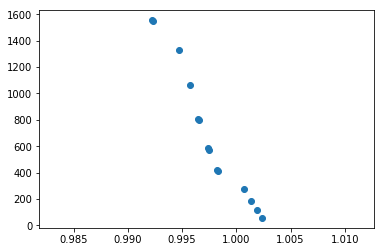

In [9]:
plt.scatter(truth.loc[pid].absolute_momentum, truth.loc[pid].norm)

In [10]:
pt = truth.loc[pid][['absolute_momentum', 'norm']]
pt

,absolute_momentum,norm
hit_id,,
20950,1.002357,56.649628
28274,1.001884,120.358994
35016,1.001336,188.528351
41253,1.000665,275.700562
73304,0.998245,419.749115
73311,0.998337,410.534973
80058,0.997410,582.861084
80059,0.997473,573.971619
86256,0.996463,807.444885


In [11]:
particle_ids = truth.index.get_level_values(0).unique()[1:]

disagreements = 0
for pid in particle_ids:
    pt = truth.loc[pid].sort_values(by='absolute_momentum')
    disagreements += not pt.norm.is_monotonic_decreasing
    
    
print("total particle count:", particle_ids.shape[0])
print("disagreement count:", disagreements)
print("ratio:", disagreements/particle_ids.shape[0])

total particle count: 10565
disagreement count: 729
ratio: 0.06900141978230005


In [149]:
truth.columns

Index(['tx', 'ty', 'tz', 'tpx', 'tpy', 'tpz', 'weight', 'absolute_momentum',
       'norm'],
      dtype='object')

In [ ]:
particle_ids = truth.index.get_level_values(0).unique()[1:101]

disagreements = 0
for pid in particle_ids:
    pt = truth.loc[pid].sort_values(by=tz)



###################################
hits: 5


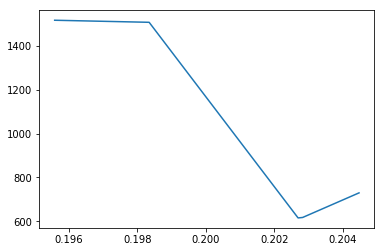

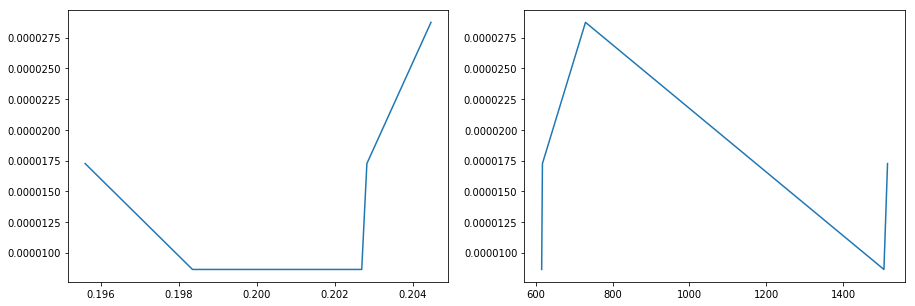



###################################
hits: 10


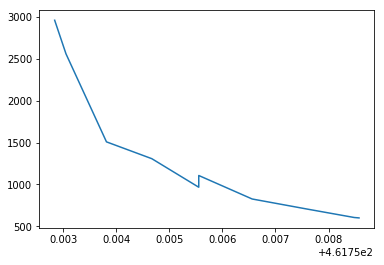

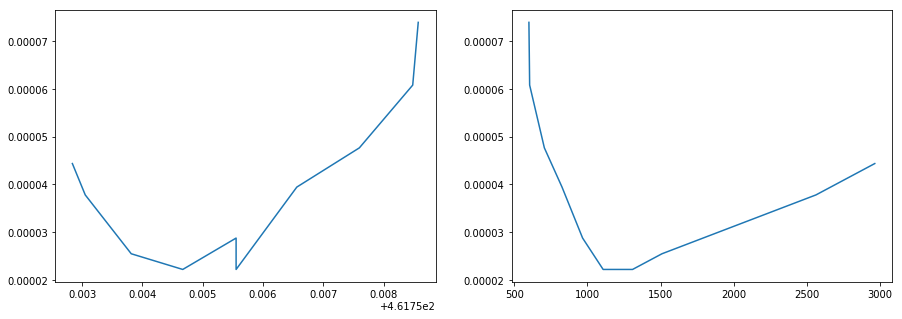



###################################
hits: 11


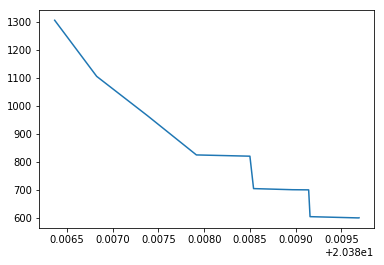

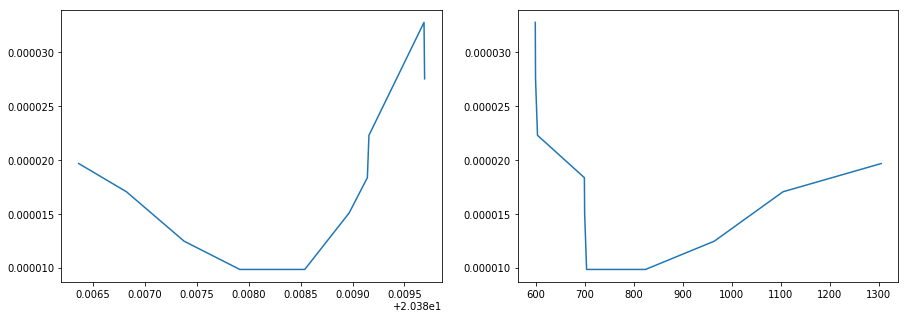



###################################
hits: 2


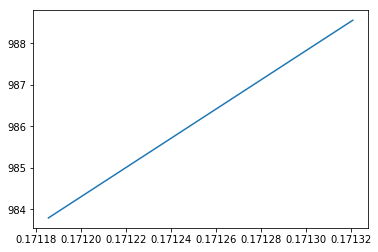

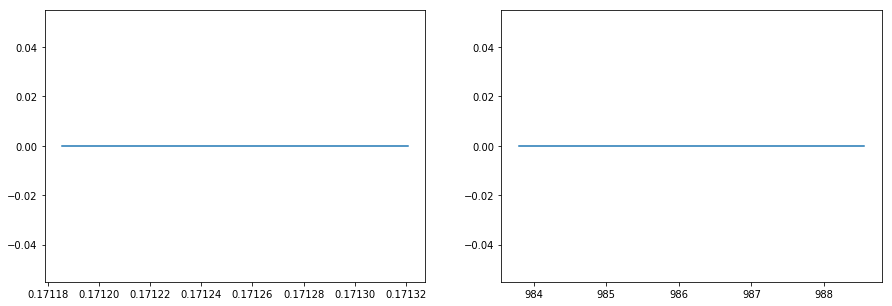



###################################
hits: 3


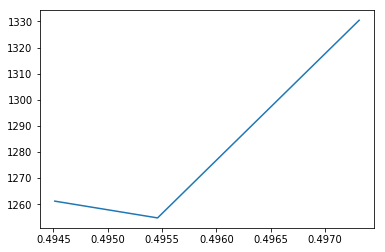

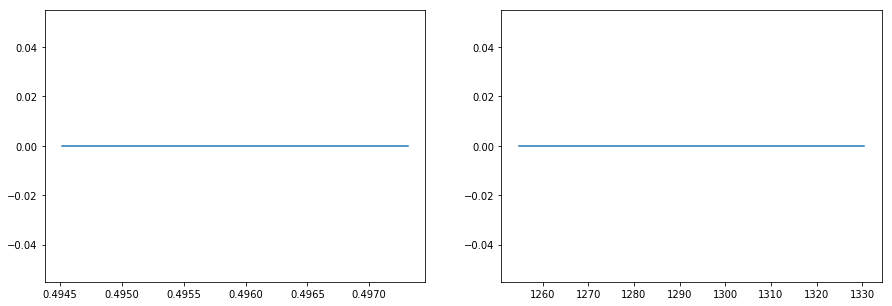



###################################
hits: 15


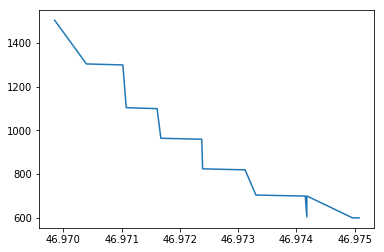

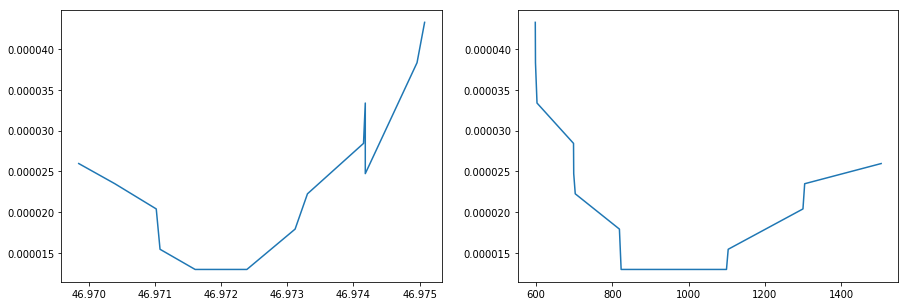



###################################
hits: 12


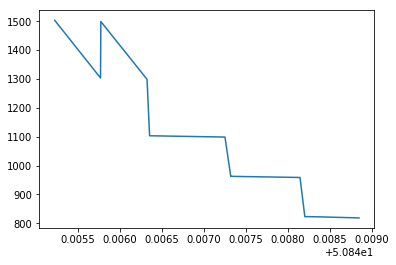

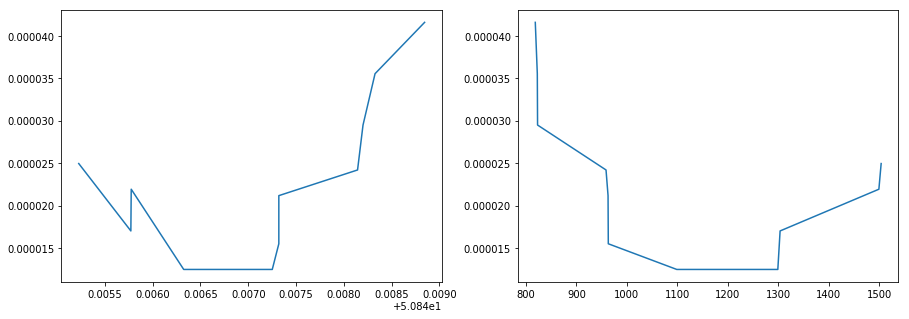



###################################
hits: 12


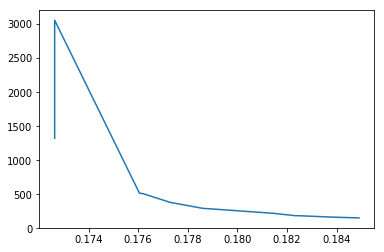

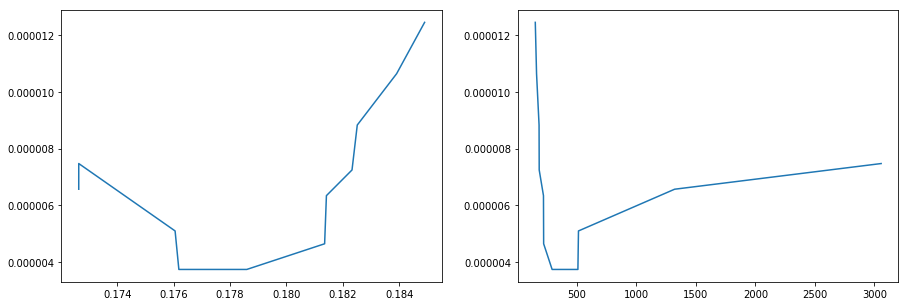



###################################
hits: 12


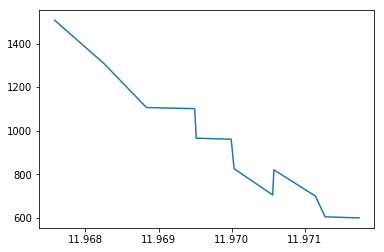

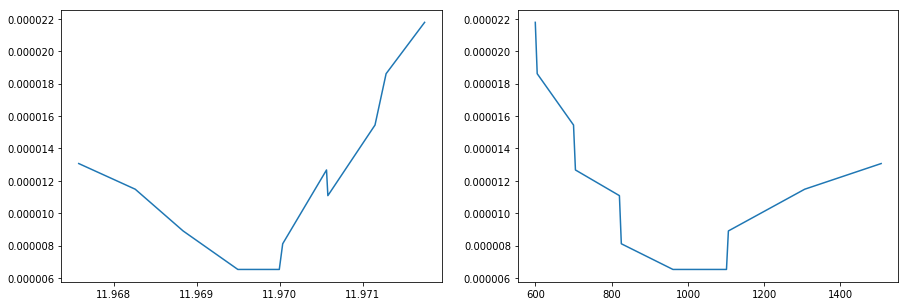



###################################
hits: 7


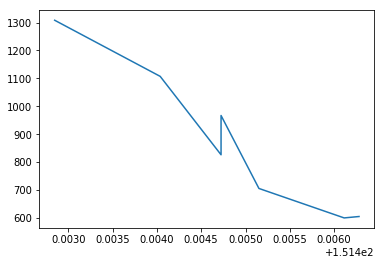

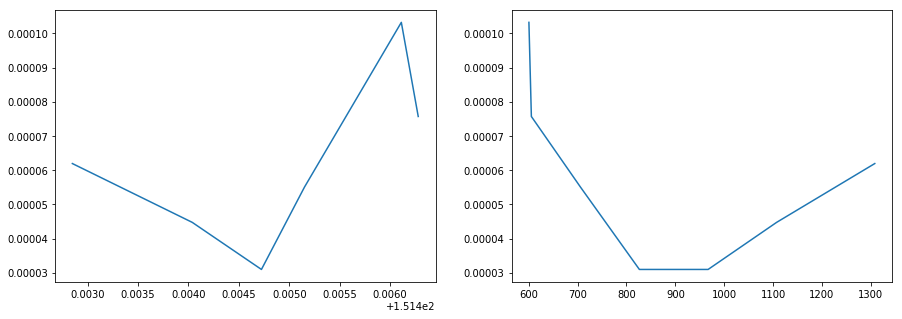



###################################
hits: 17


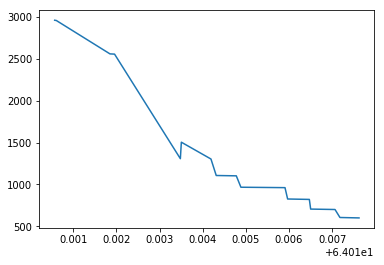

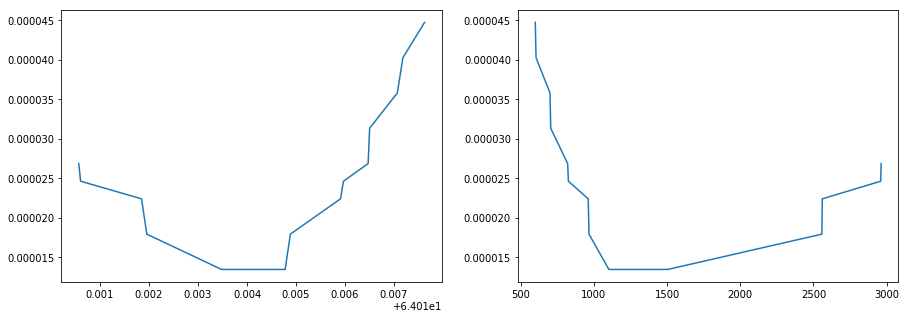



###################################
hits: 14


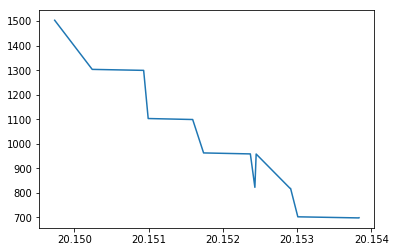

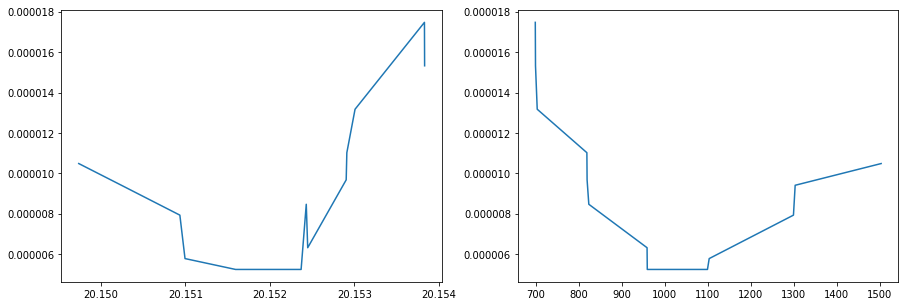



###################################
hits: 12


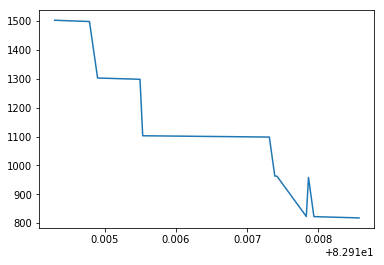

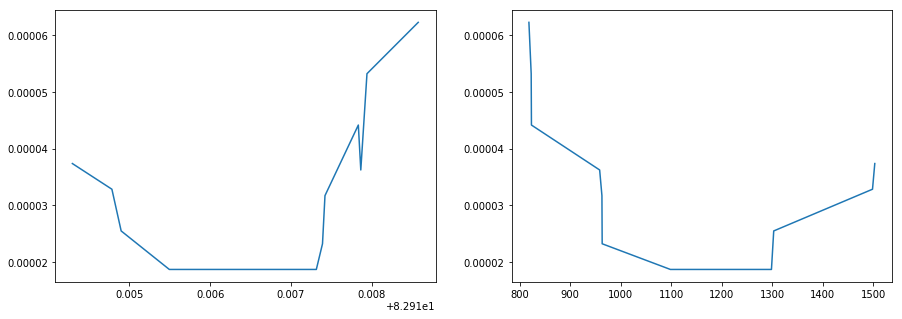



###################################
hits: 8


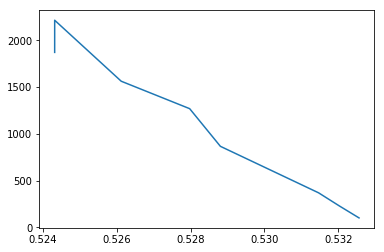

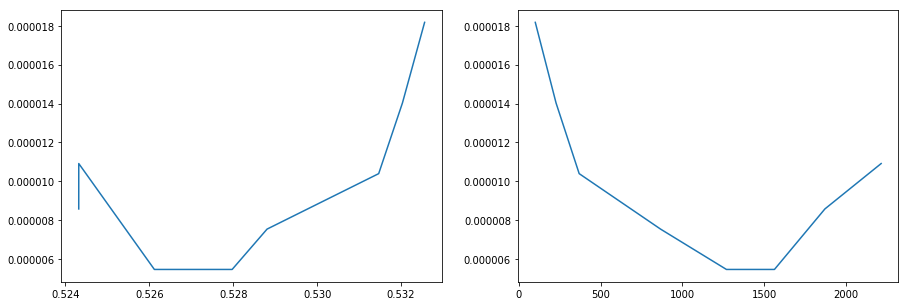



###################################
hits: 8


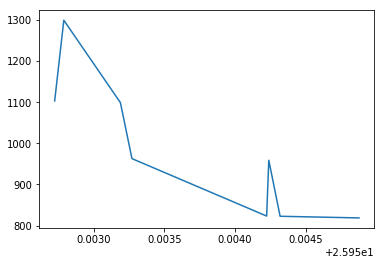

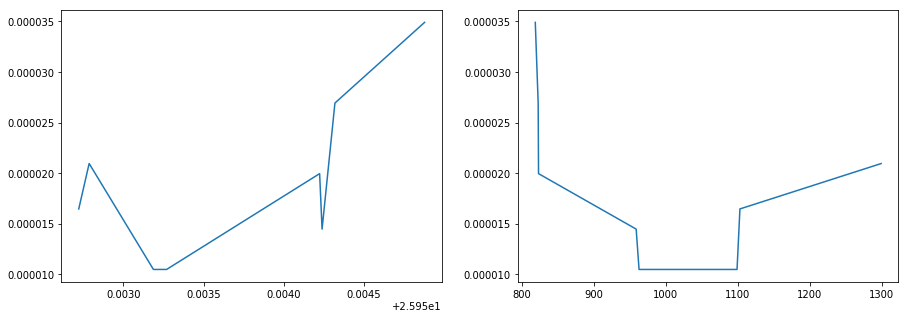



###################################
hits: 13


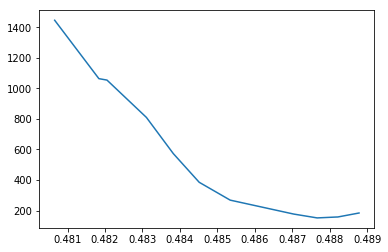

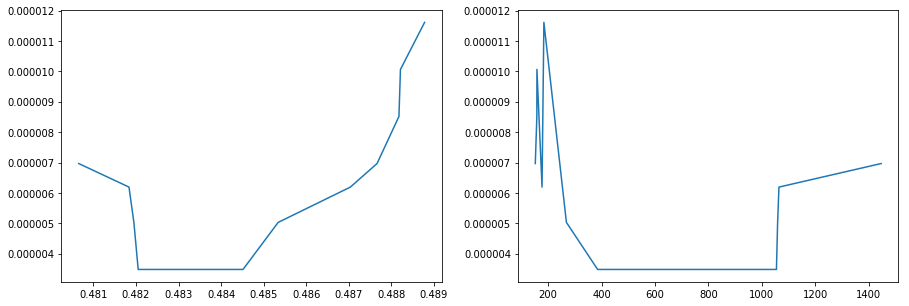



###################################
hits: 12


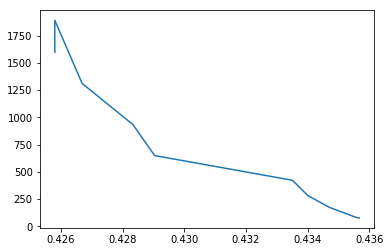

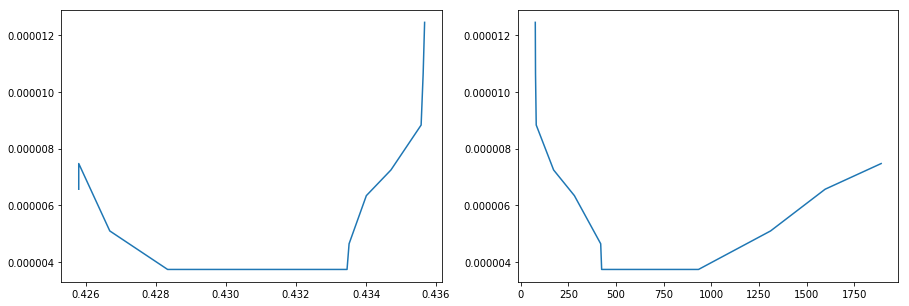



###################################
hits: 8


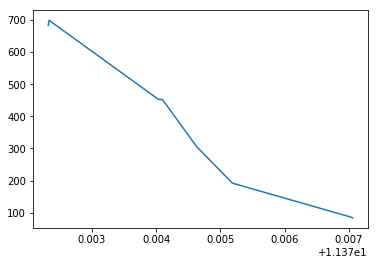

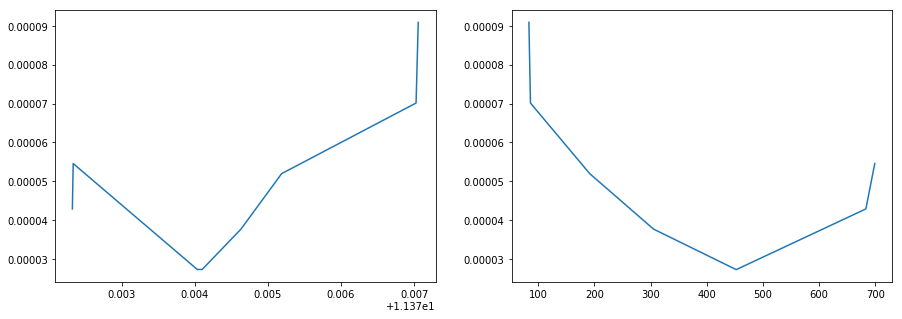



###################################
hits: 11


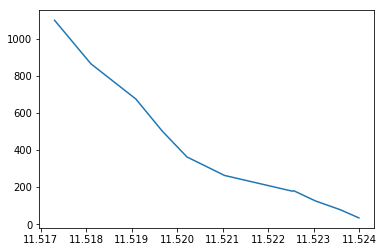

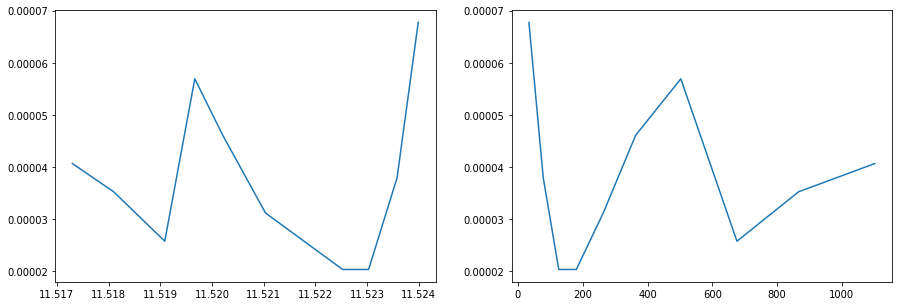



###################################
hits: 7


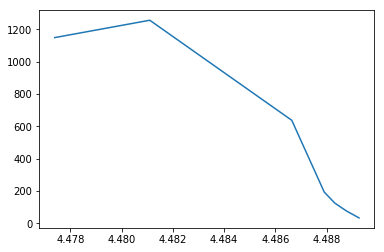

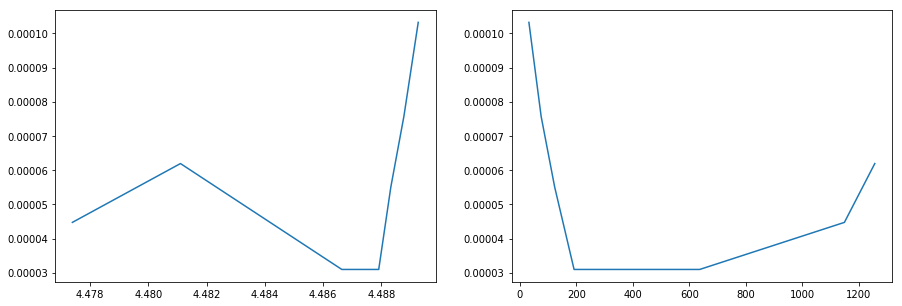



###################################
hits: 15


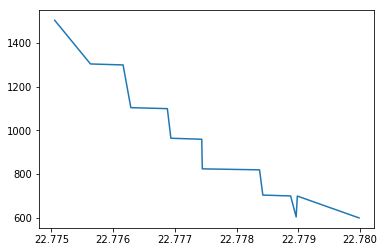

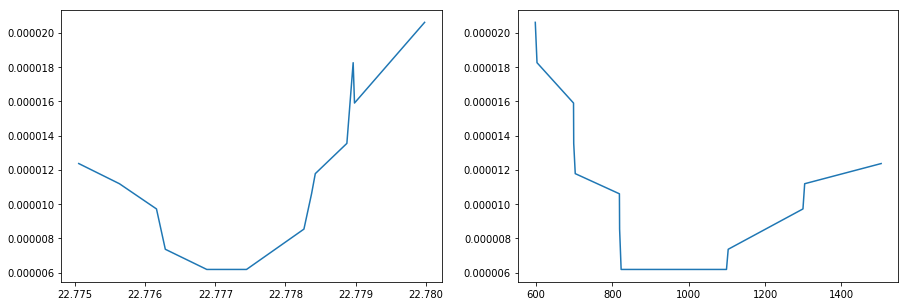



###################################
hits: 11


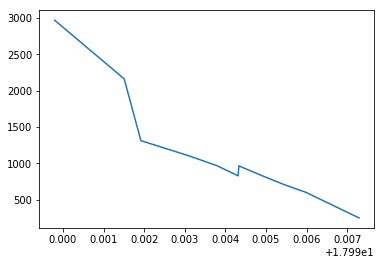

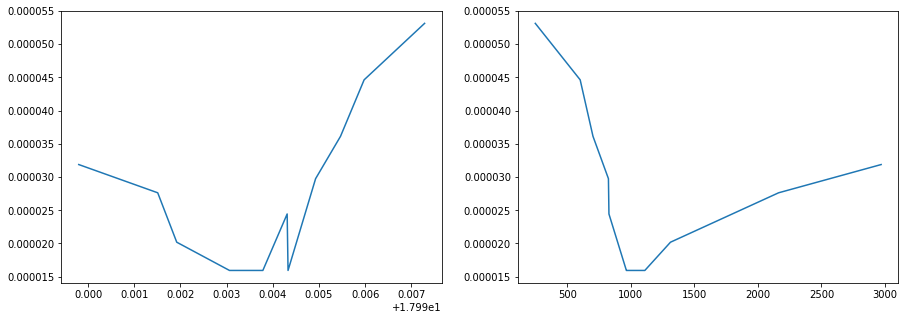



###################################
hits: 9


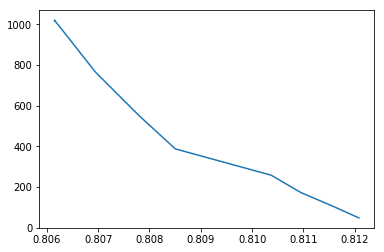

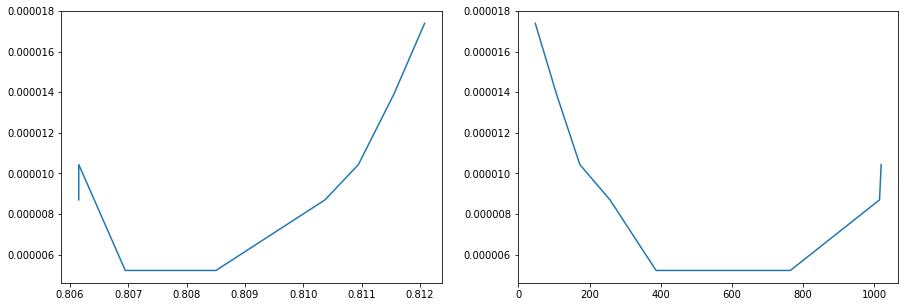



###################################
hits: 5


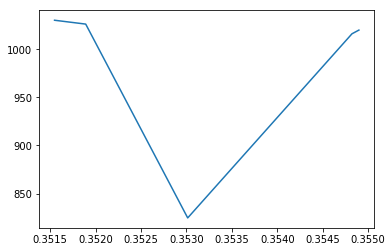

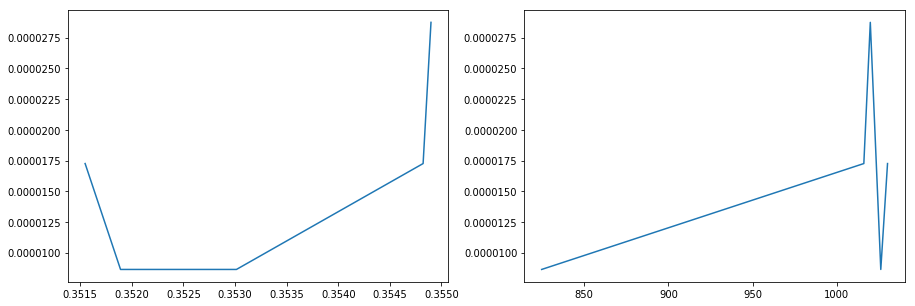



###################################
hits: 15


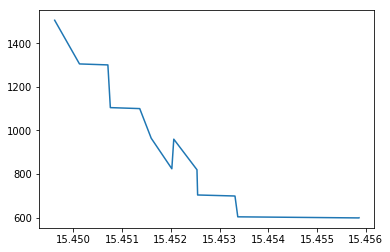

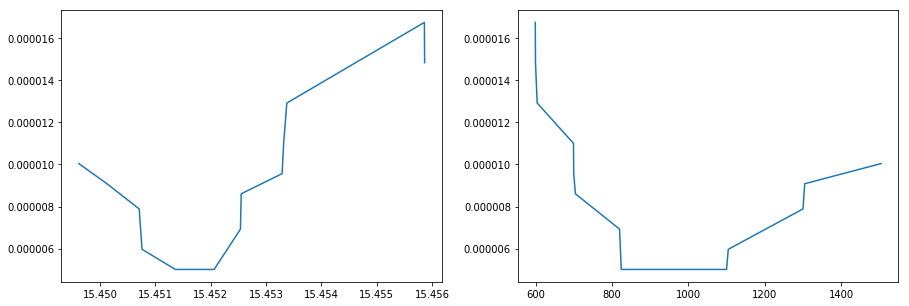



###################################
hits: 11


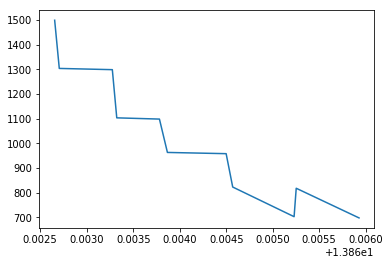

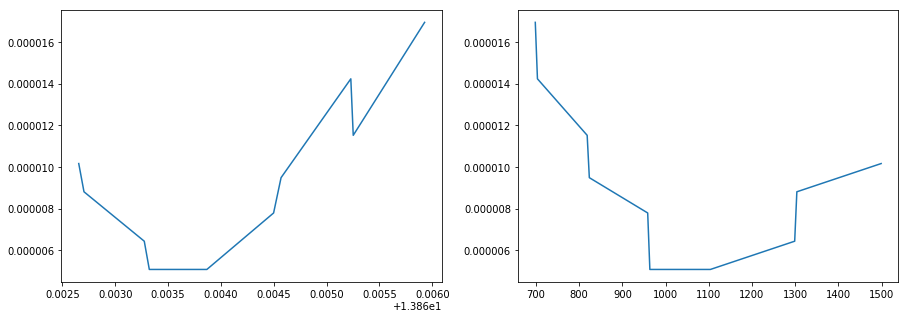



###################################
hits: 11


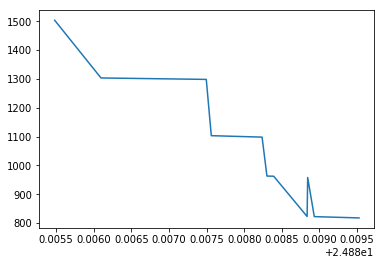

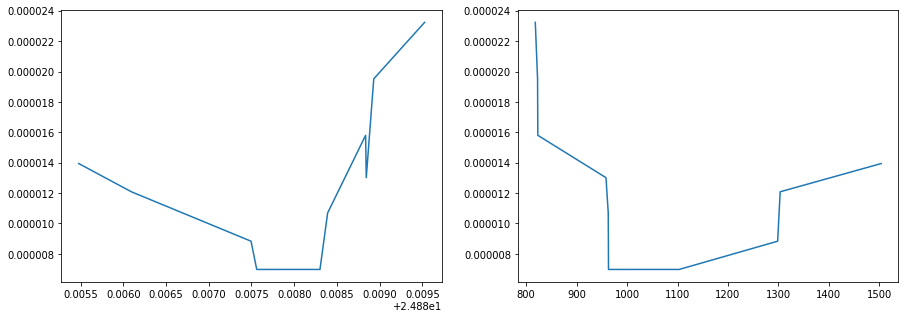



###################################
hits: 10


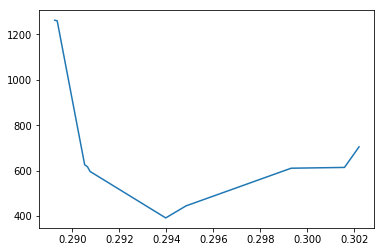

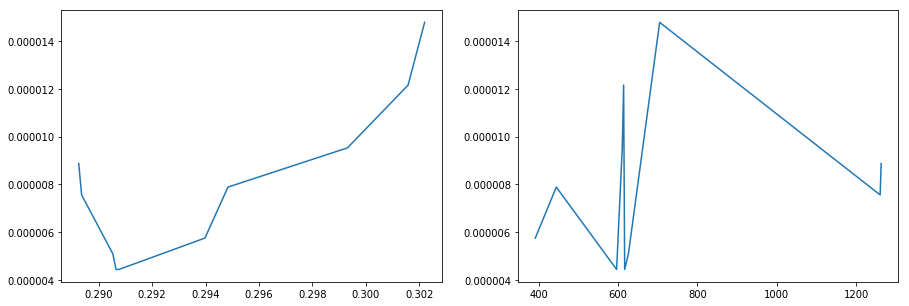



###################################
hits: 3


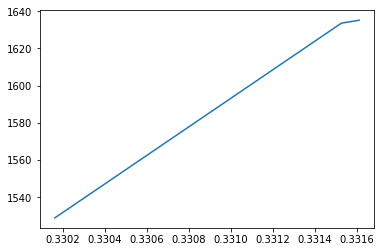

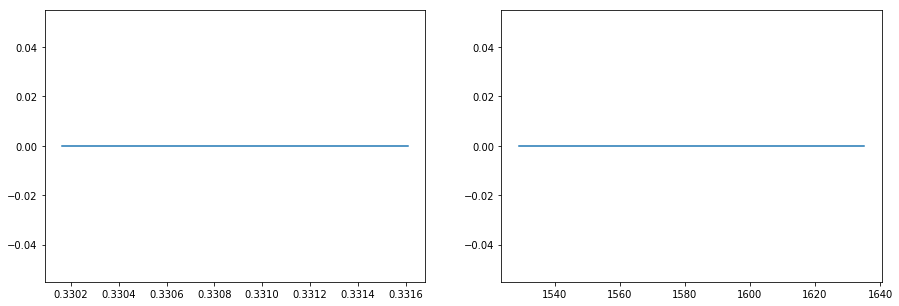



###################################
hits: 14


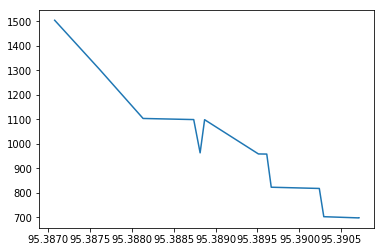

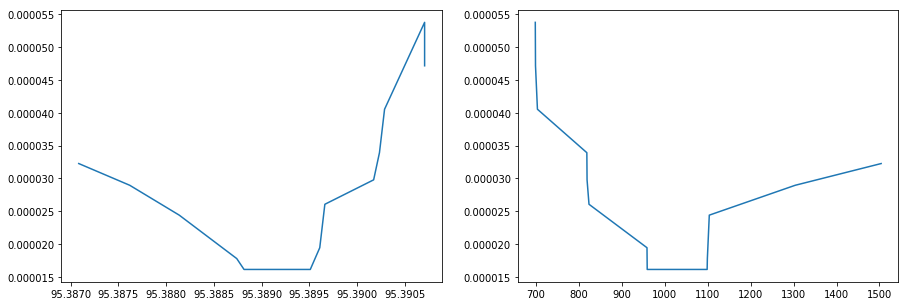



###################################
hits: 12


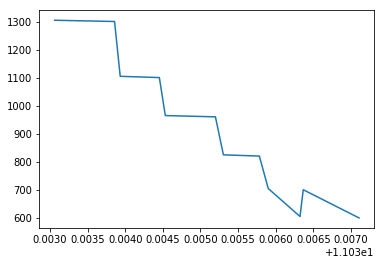

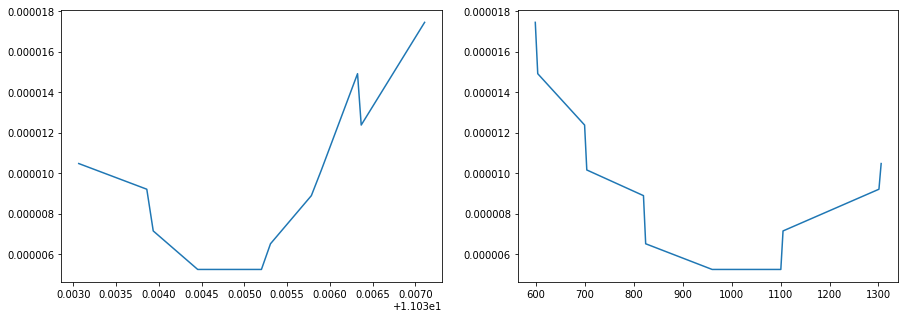



###################################
hits: 10


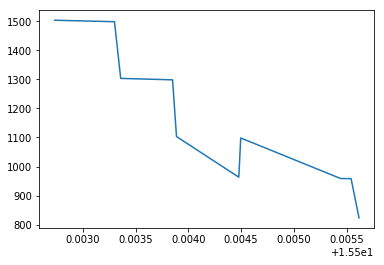

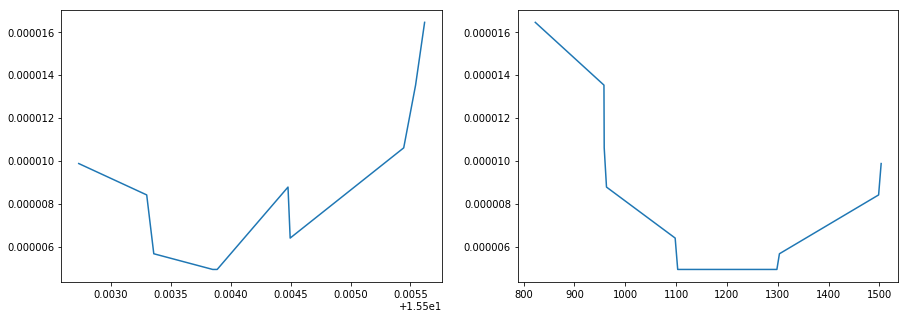



###################################
hits: 13


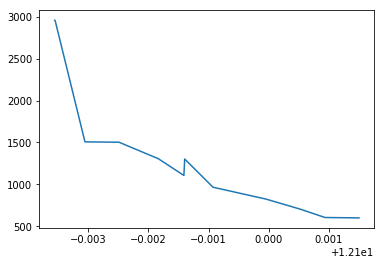

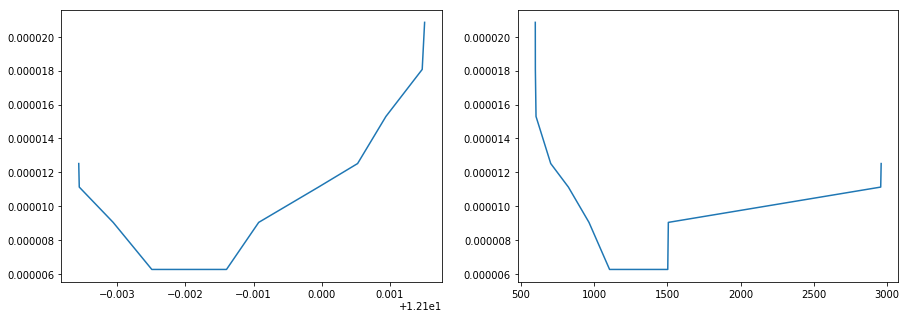



###################################
hits: 9


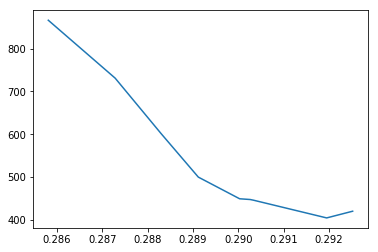

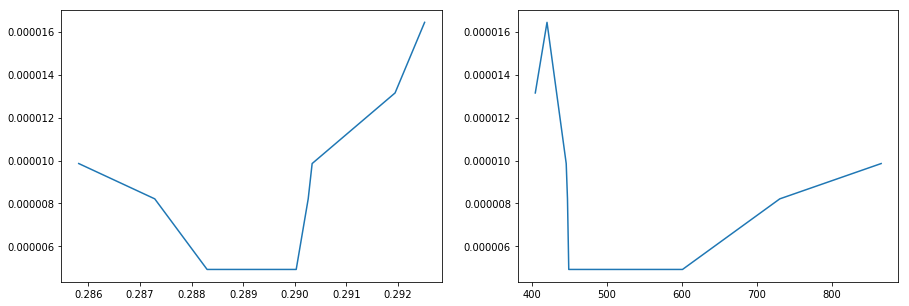



###################################
hits: 13


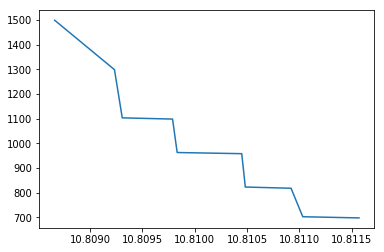

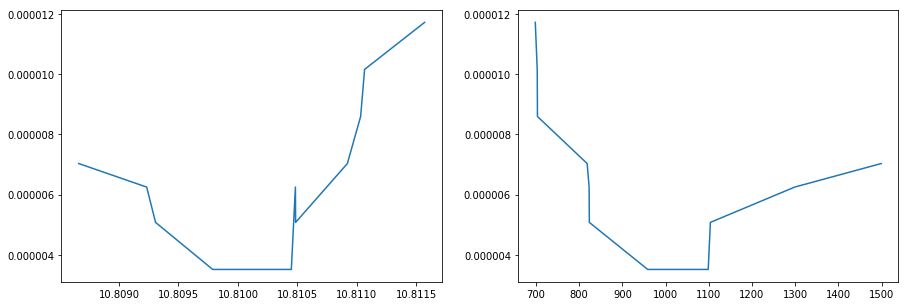



###################################
hits: 4


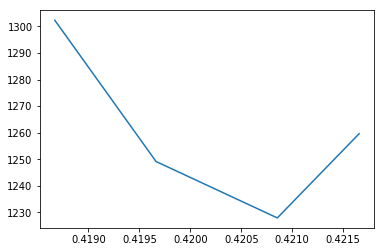

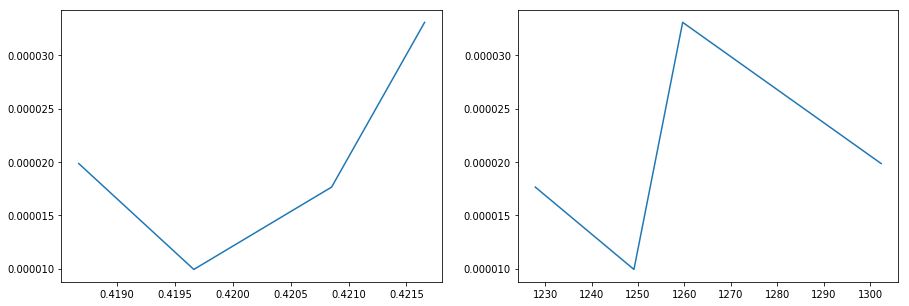



###################################
hits: 10


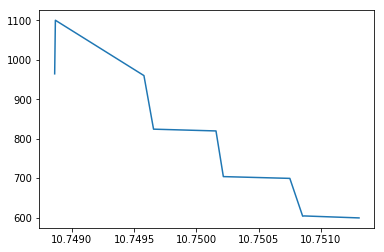

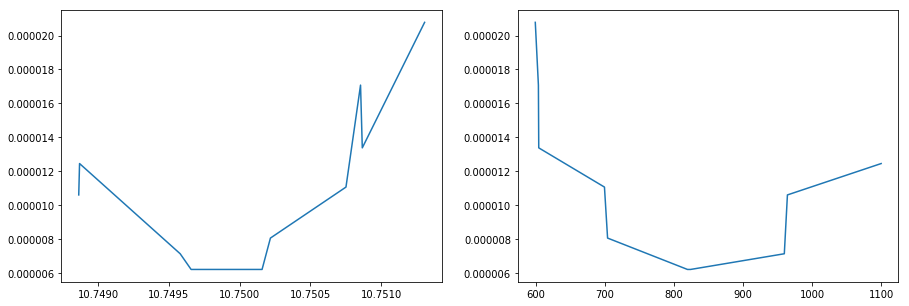



###################################
hits: 6


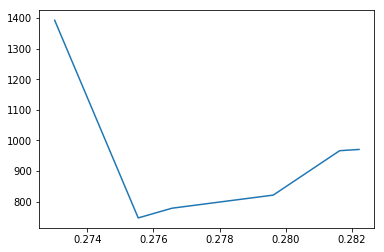

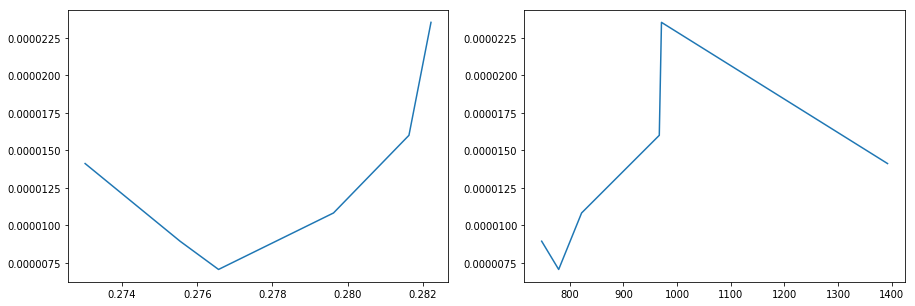



###################################
hits: 3


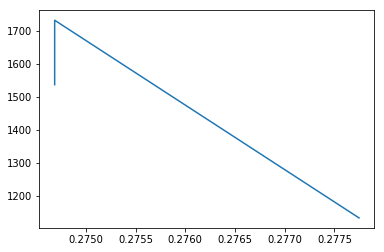

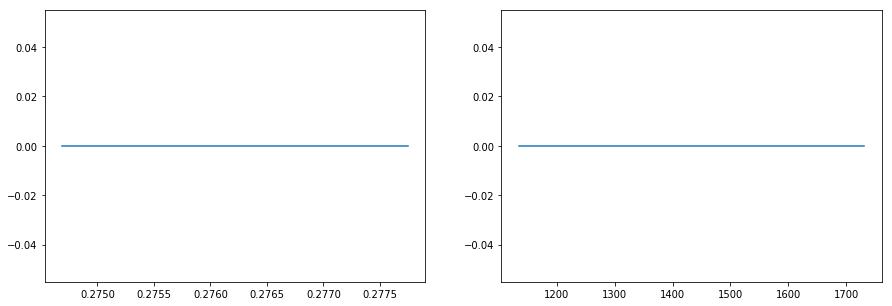



###################################
hits: 12


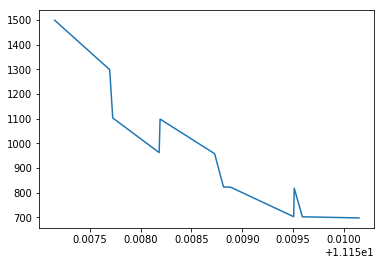

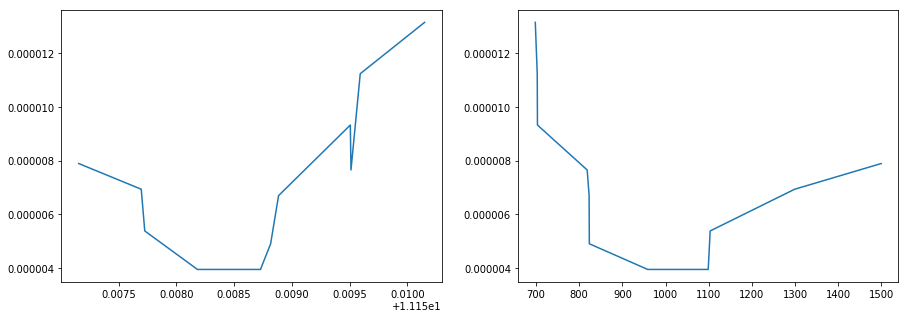



###################################
hits: 12


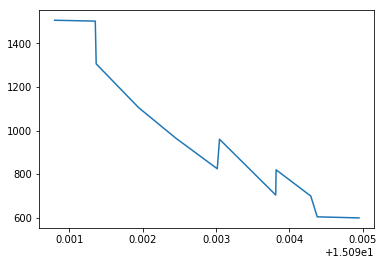

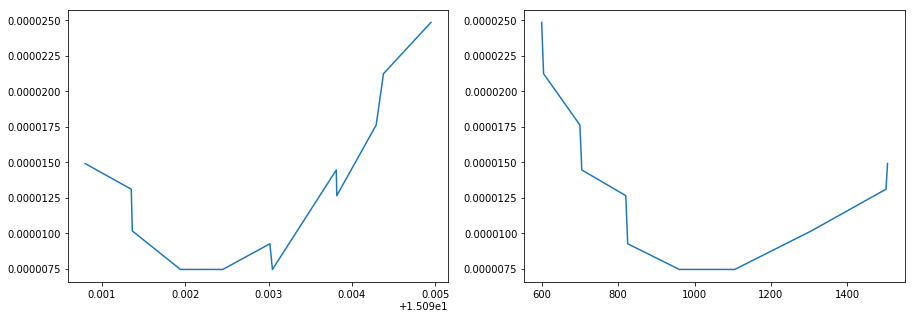



###################################
hits: 8


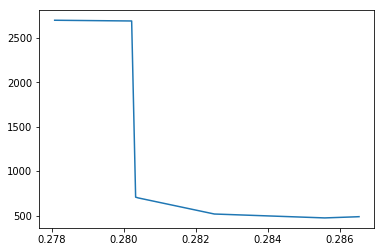

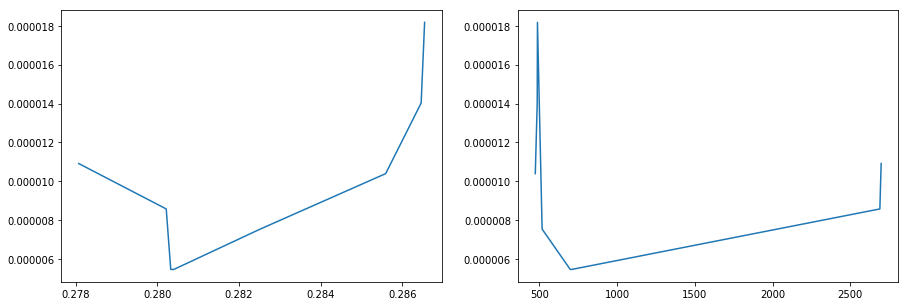



###################################
hits: 3


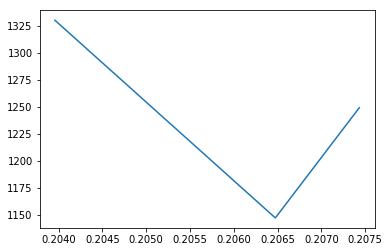

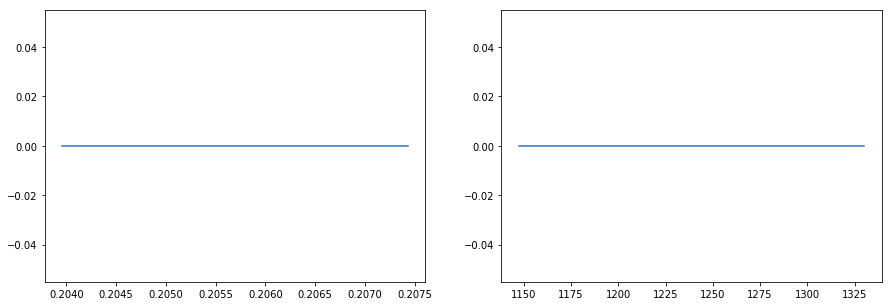



###################################
hits: 12


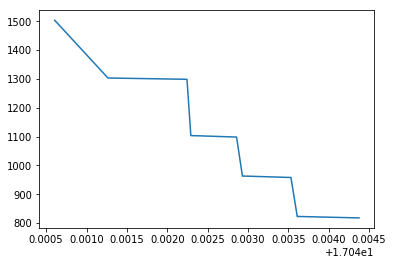

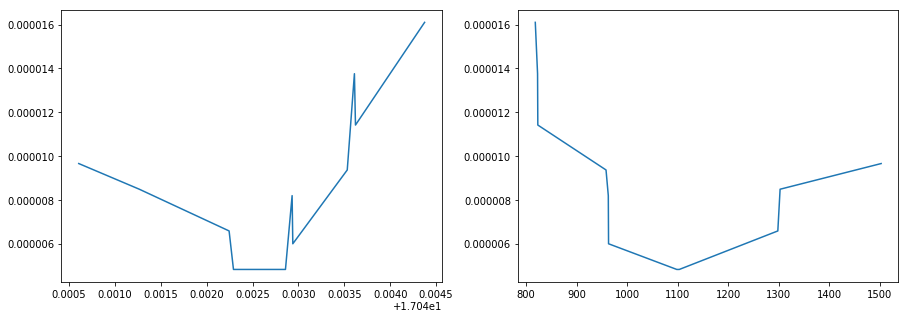



###################################
hits: 15


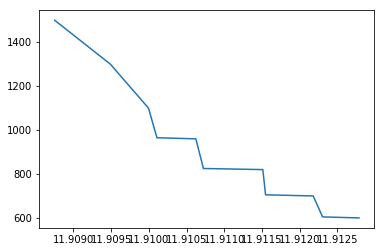

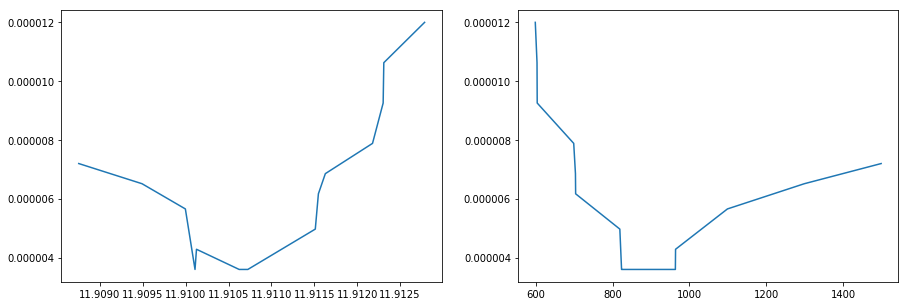



###################################
hits: 12


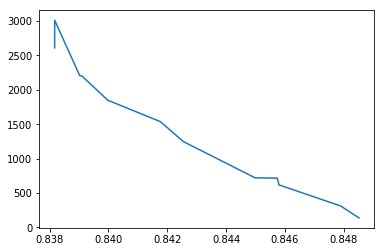

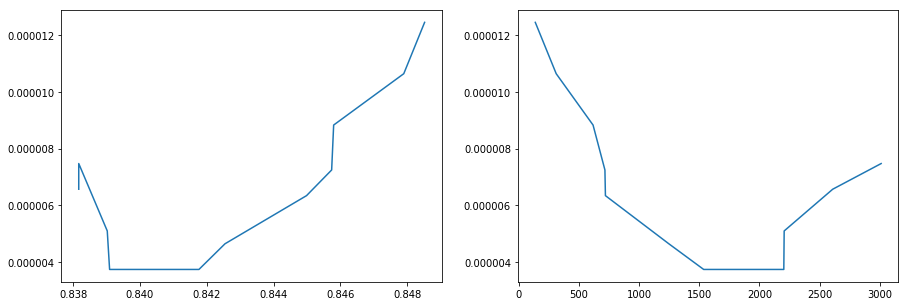



###################################
hits: 12


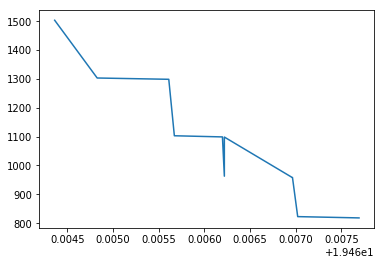

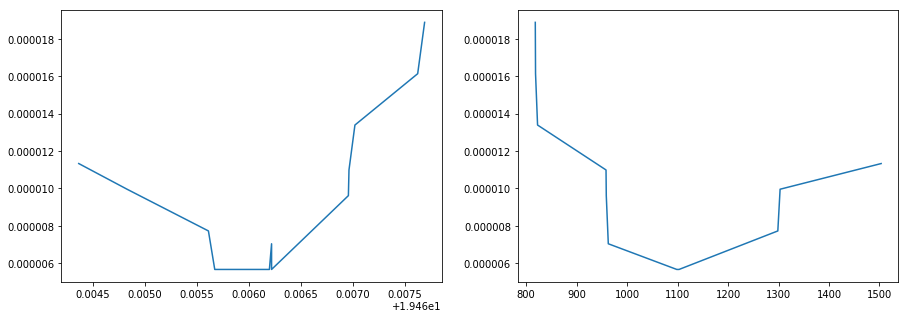



###################################
hits: 7


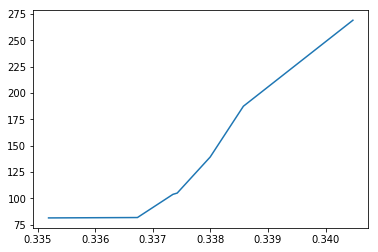

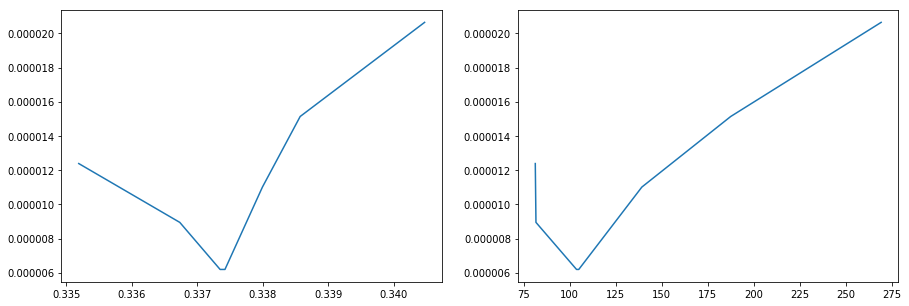



###################################
hits: 6


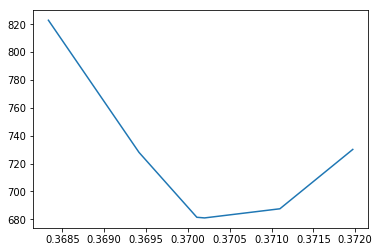

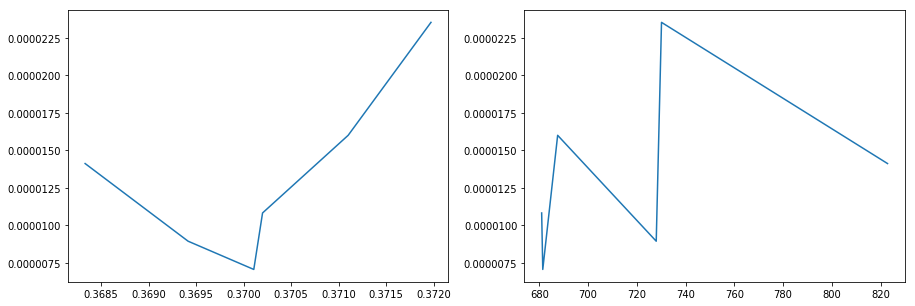



###################################
hits: 11


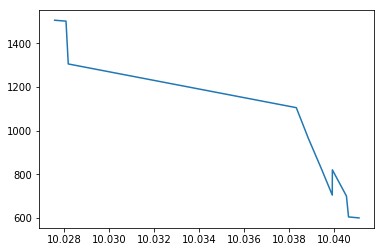

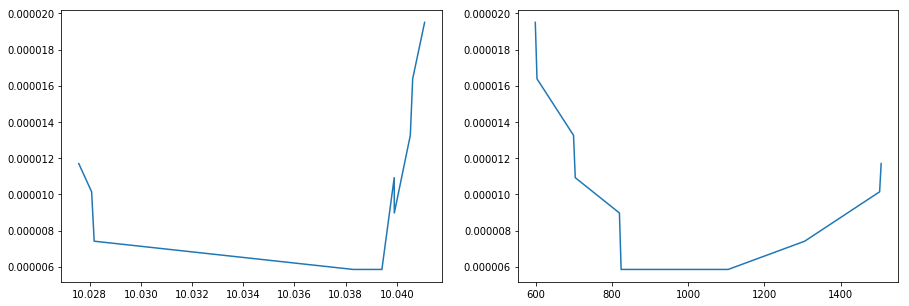



###################################
hits: 12


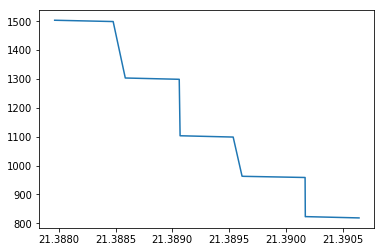

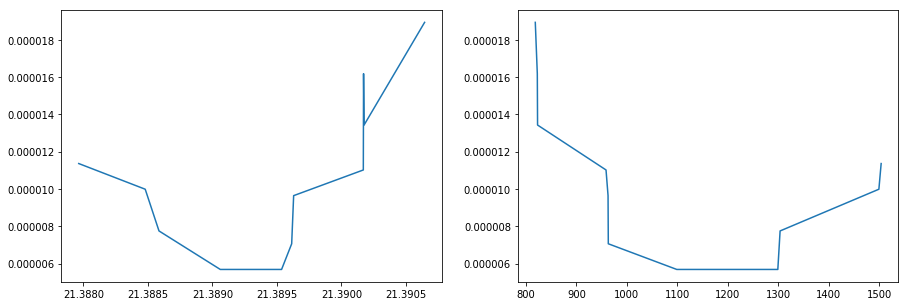



###################################
hits: 12


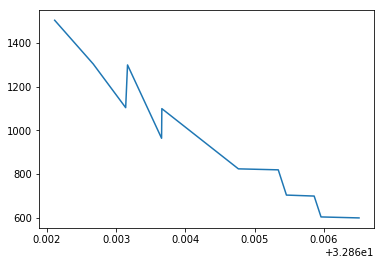

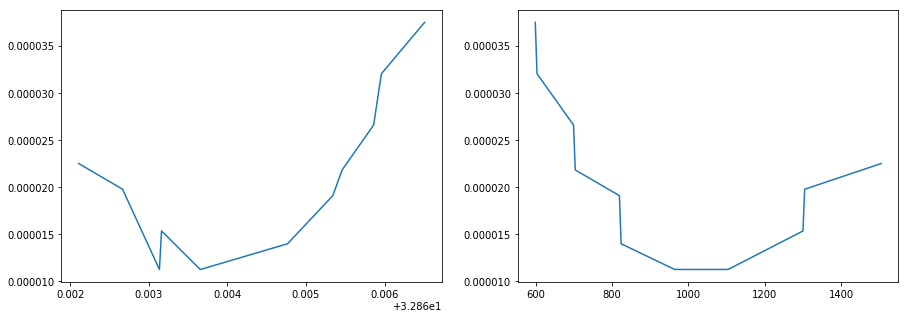



###################################
hits: 15


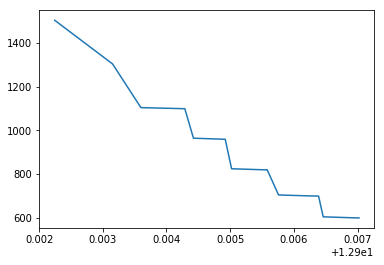

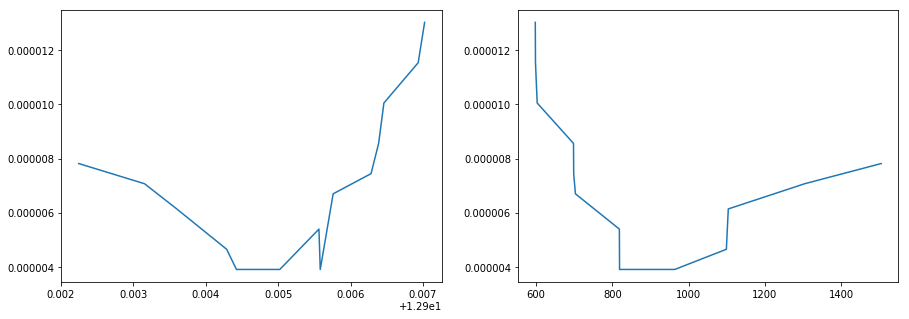



###################################
hits: 11


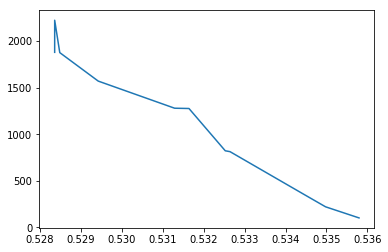

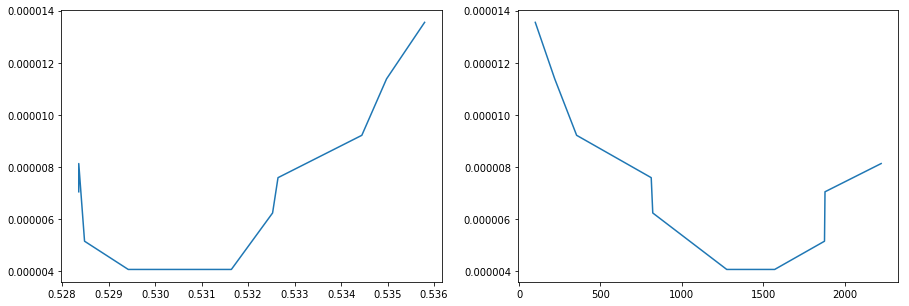



###################################
hits: 4


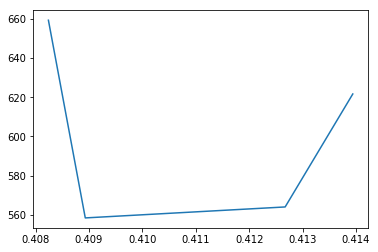

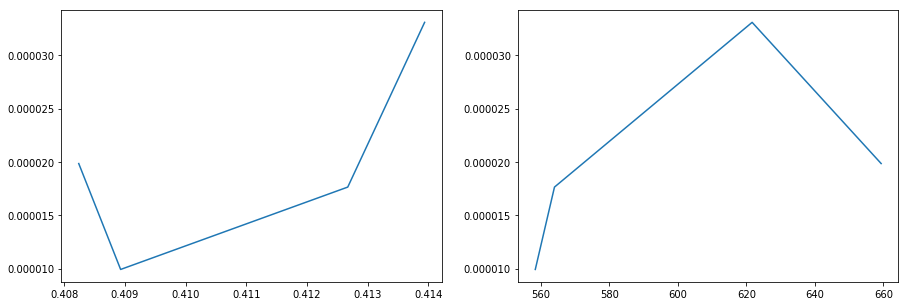



###################################
hits: 8


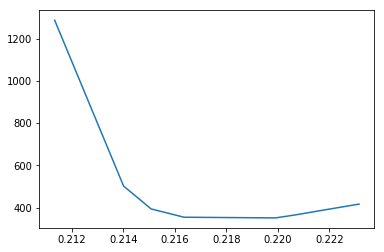

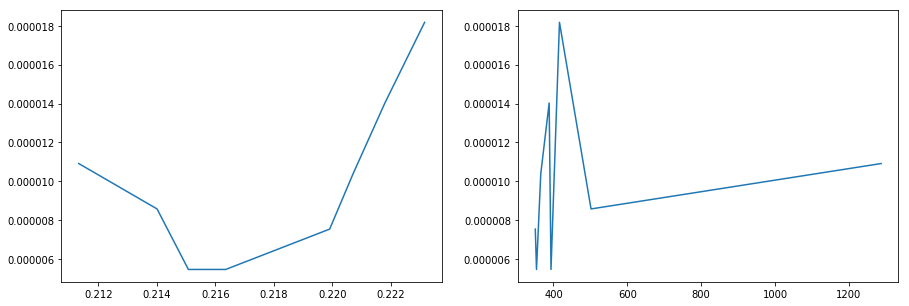



###################################
hits: 12


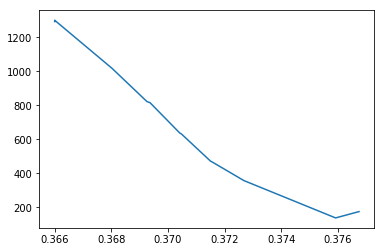

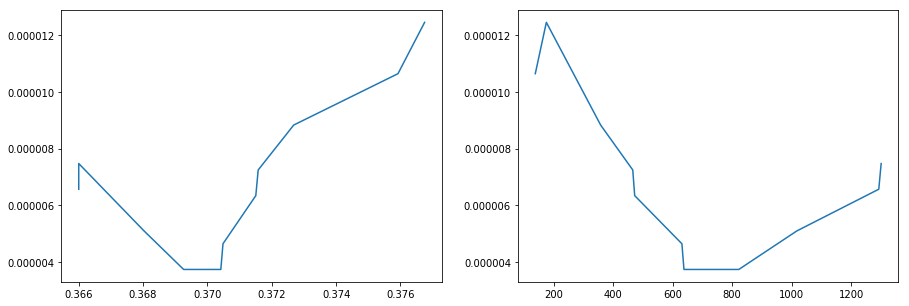



###################################
hits: 13


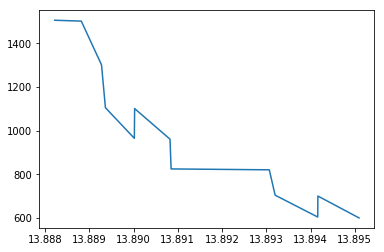

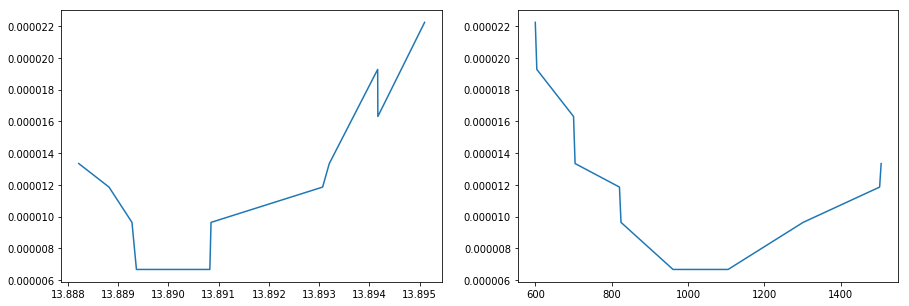



###################################
hits: 14


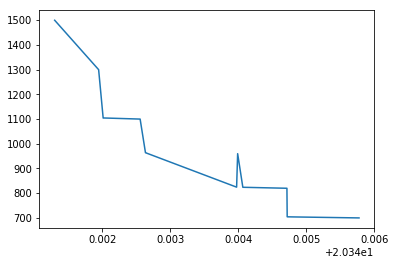

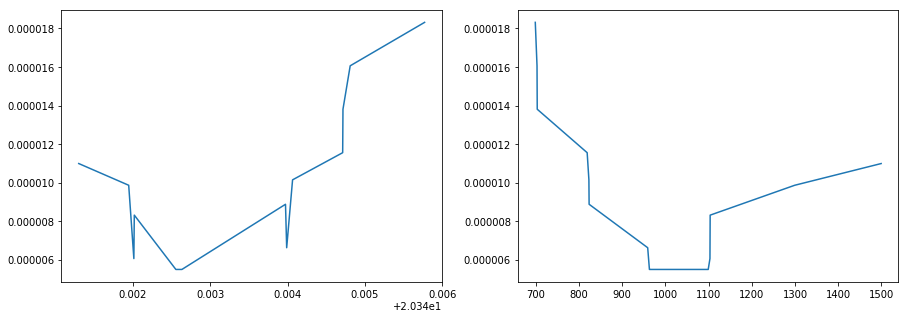



###################################
hits: 15


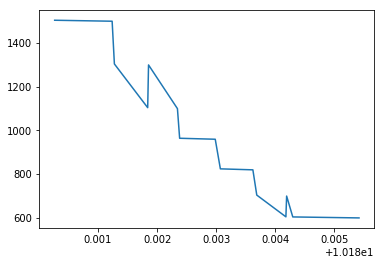

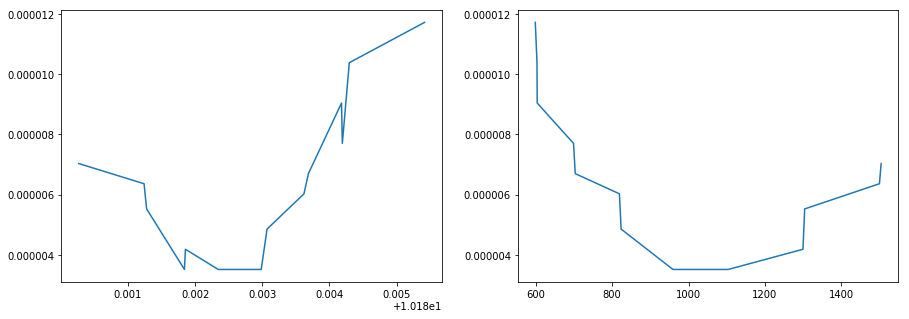



###################################
hits: 11


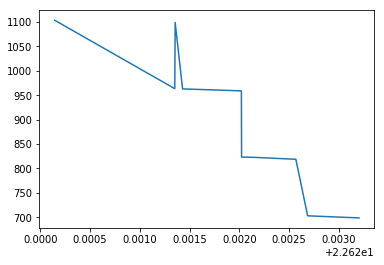

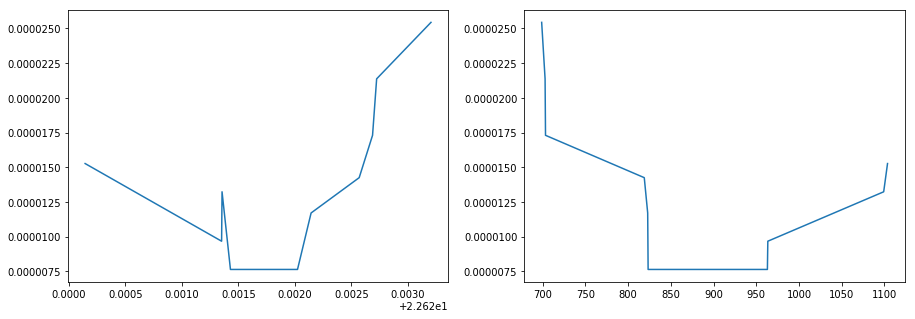



###################################
hits: 15


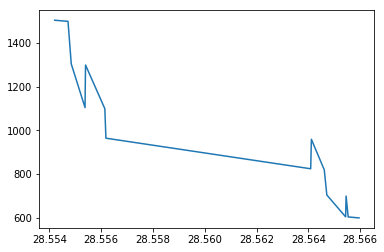

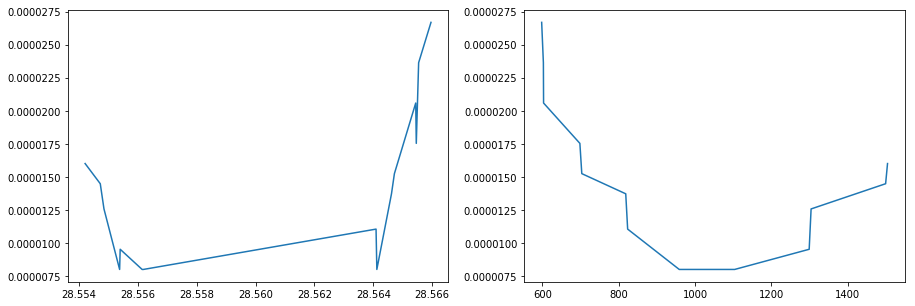



###################################
hits: 15


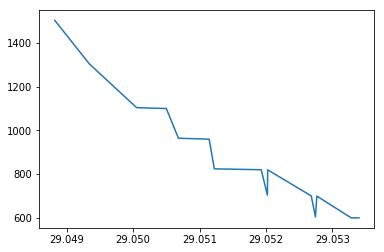

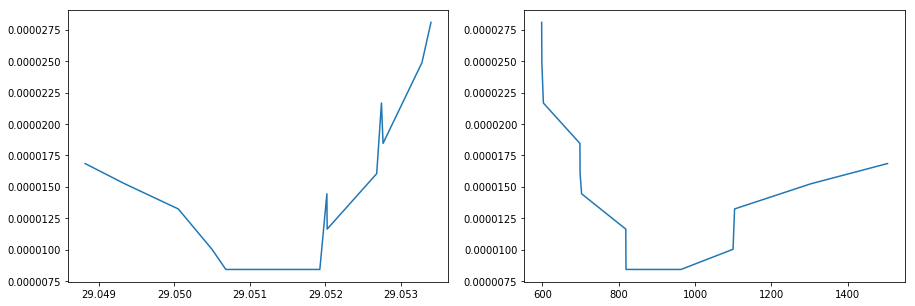



###################################
hits: 2


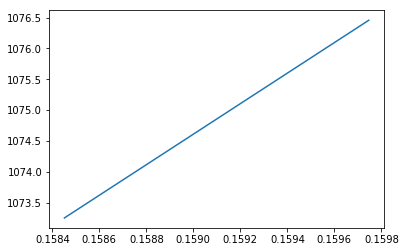

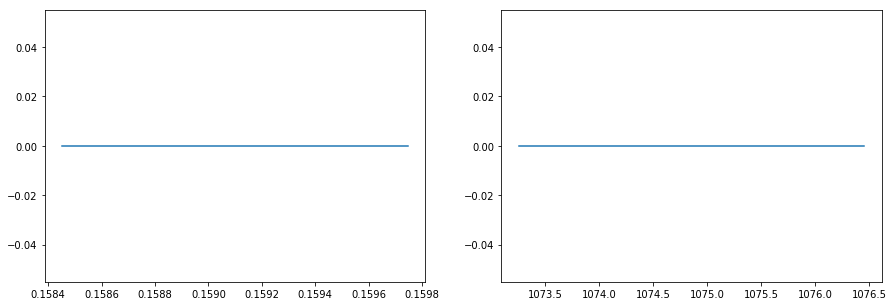



###################################
hits: 7


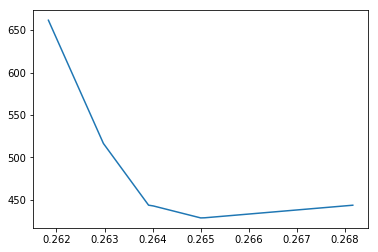

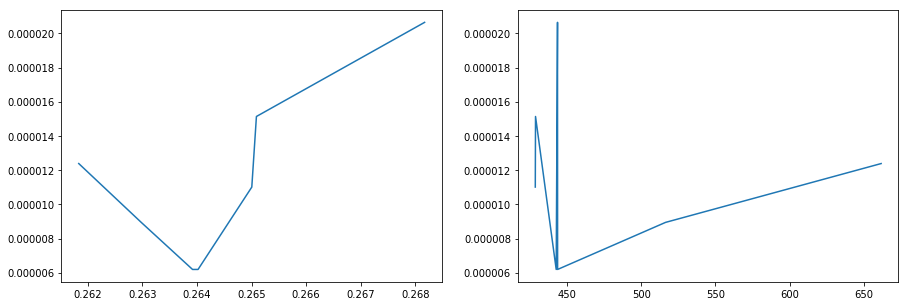



###################################
hits: 11


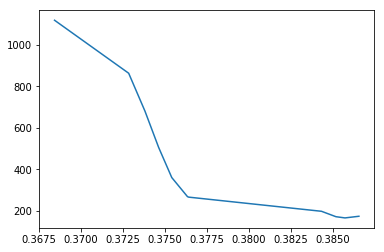

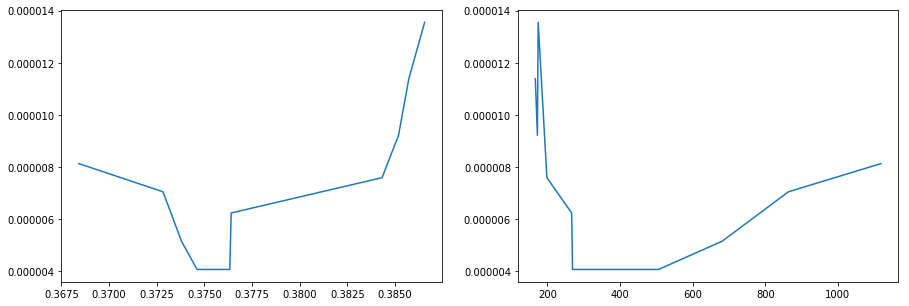



###################################
hits: 12


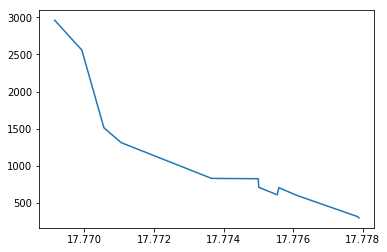

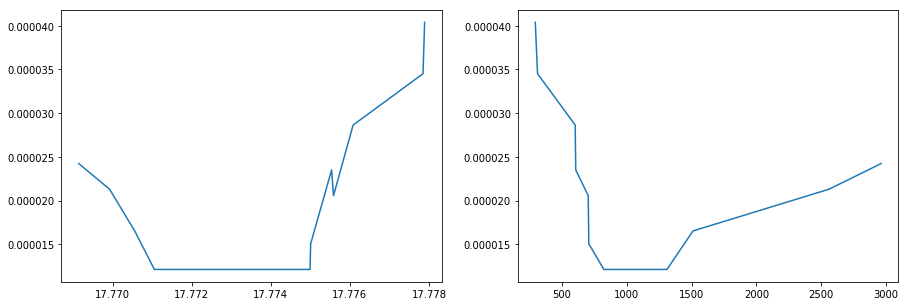



###################################
hits: 6


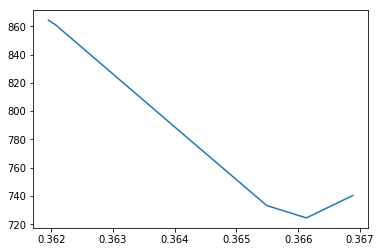

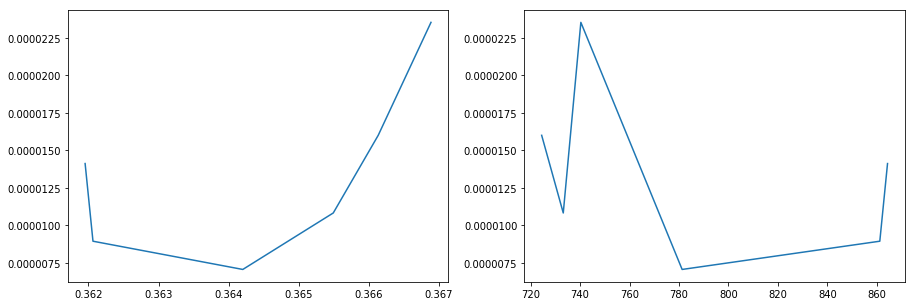



###################################
hits: 13


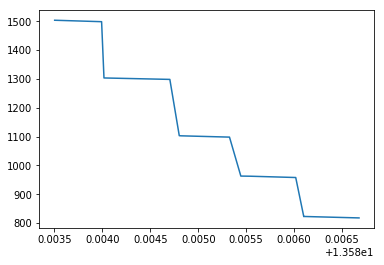

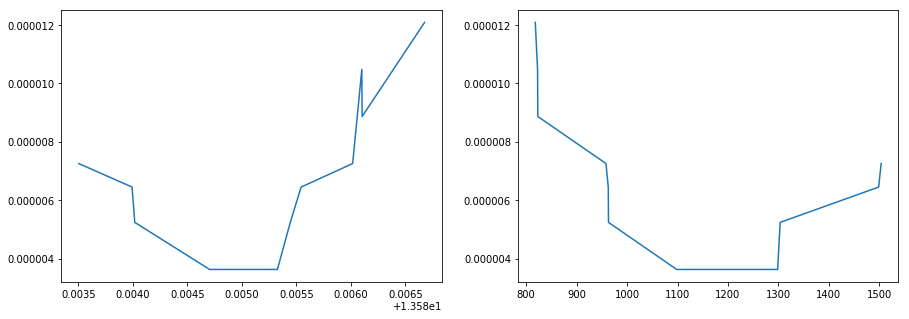

In [147]:
particle_ids = truth.index.get_level_values(0).unique()[1:1001]

for pid in particle_ids:
    pt = truth.loc[pid].sort_values(by='absolute_momentum')
    if not pt.norm.is_monotonic_decreasing:
        print('\n\n###################################')
        print('hits:', pt.shape[0])
        plt.plot(pt.absolute_momentum, pt.norm)
        plt.show()
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        ax1.plot(pt.absolute_momentum, pt.weight)
        pt.sort_values(by='norm', inplace=True)
        ax2.plot(pt.norm, pt.weight)
        plt.show()

In [129]:
truth.head()

tx        ty      tz       tpx            tpy  \
particle_id hit_id                                                          
0           1       -64.411598  -7.16412 -1502.5  250710.0 -149908.000000   
            3       -83.828003  -1.14558 -1502.5  626295.0 -169767.000000   
            12      -42.617699 -10.66610 -1502.5 -270443.0   83056.703125   
            31     -152.171005 -23.80640 -1498.0  339705.0  -13076.400391   
            49     -108.177002 -20.43800 -1502.0 -484376.0 -559731.000000   

                         tpz  weight  absolute_momentum         norm  
particle_id hit_id                                                    
0           1      -956385.0     0.0       1.000000e+06  1503.897095  
            3      -760877.0     0.0       1.000000e+06  1504.837158  
            12     -959147.0     0.0       1.000000e+06  1503.142090  
            31     -940441.0     0.0       9.999999e+05  1505.897339  
            49     -672370.0     0.0       1.000000e+06  1506.029175